In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from os import path
import seaborn as sns

from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif']='Arial'

In [2]:
processed = path.join("..","data","processed_data")
data = pd.read_csv(path.join(processed,"bubble_plot_input.csv"),index_col=0)
data.head()

,iModulon_name,regulator,pvalue,qvalue,recall,precision,f1score,TP,regulon_size,imodulon_size,n_regs,Exp_variance,function,color,Exp_var_percent
iModulon_number,,,,,,,,,,,,,,,
25,NarL-1,Dnr/NarL,3.560000e-13,6.340000e-09,0.240000,0.666667,0.352941,6,25,9,2,0.28,Amino Acid and Nucleotide Biosynthesis,#29abe2,28
27,NarL-2,Dnr/NarL,2.110000e-18,3.760000e-14,0.320000,0.800000,0.457143,8,25,10,2,0.30,Amino Acid and Nucleotide Biosynthesis,#29abe2,30
11,CbrB,CbrB,1.310000e-06,5.833050e-03,0.375000,0.176471,0.240000,3,8,17,1,0.30,Amino Acid and Nucleotide Biosynthesis,#29abe2,30
55,MmsR,PrpR/MmsR,2.320000e-07,4.136930e-03,0.375000,0.300000,0.333333,3,8,10,2,0.50,Amino Acid and Nucleotide Biosynthesis,#29abe2,50
67,ErbR-1,LldR/ErbR,5.040000e-12,8.980000e-08,0.466667,0.166667,0.245614,7,15,42,2,0.47,Amino Acid and Nucleotide Biosynthesis,#29abe2,47


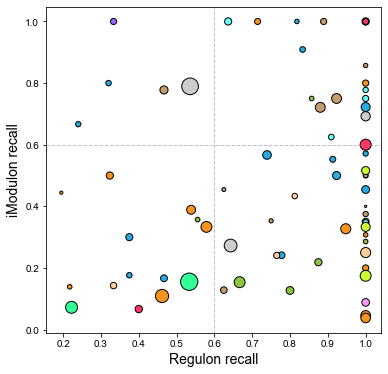

In [6]:
fig, ax = plt.subplots(figsize=(6,6))


scatter = ax.scatter(data.recall, data.precision,  s=data.Exp_var_percent, 
                     c=data.color,  alpha=1.0, edgecolors='black',)



plt.xlabel("Regulon recall", size=14)
plt.ylabel("iModulon recall", size=14)
ynew = 0.6
ax.axhline(ynew, linestyle="-.", color='gray', linewidth=0.5)
xnew = 0.6
ax.axvline(xnew, linestyle="-.", color='gray', linewidth=0.5)

# plt.savefig("../../../UCSD/Pseudo_Precise/Figures/paeru_precise02/scatter_QC.pdf", transparent=True, bbox_inches = 'tight')

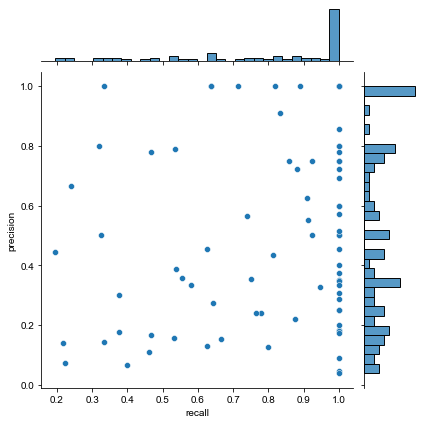

In [7]:
sns.jointplot(x=data.recall, 
              y=data.precision,
              data=data, marginal_kws=dict(bins=30, fill=True))

# plt.savefig("../../../UCSD/Pseudo_Precise/Figures/paeru_precise02/scatter_QC.pdf", transparent=True, bbox_inches = 'tight')

## Explained variance

In [6]:
ica_data=load_json_model('../Paeru_imod_112.json')

([], [])

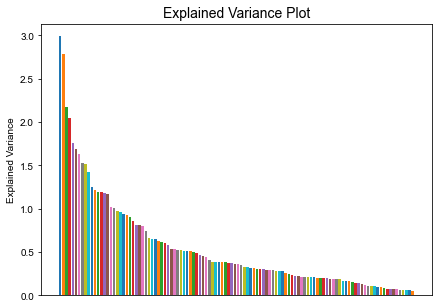

In [7]:
explained_variance_values = {}
for i in ica_data.A.index:
    explained_variance_values.update({i:explained_variance(ica_data,imodulons=i)})
fig,ax = plt.subplots(figsize=[7,5])
count = 0
sorted_dict = []
for i in sorted(explained_variance_values.values(), reverse = True):
    for j in explained_variance_values.keys():
        if explained_variance_values[j] == i:
            sorted_dict.append(j)
            
for i in sorted(explained_variance_values.values(),reverse =True):
    ax.bar(count,i)
    count += 1
    
ax.set_title("Explained Variance Plot",fontsize=14)
ax.set_ylabel("Explained Variance")
plt.xticks([],fontsize=12)



In [8]:
total = 0
for i in sorted(explained_variance_values.values(),reverse =True):
    total+=i
total

62.168786826928965